In [45]:
%matplotlib inline

# GPS data w/ python, Florian Wilhelm

https://github.com/FlorianWilhelm/gps_data_with_python/tree/master

https://youtu.be/jAKUPm-Cul0

In [46]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [47]:
import gpxpy
import gpxpy.gpx

from gps_utils import rdp

# Parsing an existing file:
# -------------------------

gpx_file = open('/Users/halilbayindir/Desktop/new_data/activity_11807472225.gpx', 'r')
#gpx_file = open('./data/activity_11807472225.gpx', 'r')

gpx = gpxpy.parse(gpx_file)

In [48]:
!gpxinfo '/Users/halilbayindir/Desktop/new_data/activity_11807472225.gpx'
#!gpxinfo './data/activity_11807472225.gpx'

File: /Users/halilbayindir/Desktop/new_data/activity_11807472225.gpx
    Length 2D: 12.823km
    Length 3D: 12.823km
    Moving time: 01:12:33
    Stopped time: 00:00:57
    Max speed: 3.46m/s = 12.45km/h (raw: 4.30m/s = 15.48km/h)
    Avg speed: 2.94m/s = 10.60km/h
    Total uphill: 0.00m
    Total downhill: 0.00m
    Started: 2023-08-17 03:11:29+00:00
    Ended: 2023-08-17 04:25:34+00:00
    Points: 4446
    Avg distance between points: 2.88m

    Track #0, Segment #0
        Length 2D: 12.823km
        Length 3D: 12.823km
        Moving time: 01:12:33
        Stopped time: 00:00:57
        Max speed: 3.46m/s = 12.45km/h (raw: 4.30m/s = 15.48km/h)
        Avg speed: 2.94m/s = 10.60km/h
        Total uphill: 0.00m
        Total downhill: 0.00m
        Started: 2023-08-17 03:11:29+00:00
        Ended: 2023-08-17 04:25:34+00:00
        Points: 4446
        Avg distance between points: 2.88m



In [49]:
moving_data = gpx.get_moving_data(raw=True)

In [50]:
moving_data

MovingData(moving_time=4353.0, stopped_time=57.0, moving_distance=12817.034996631506, stopped_distance=6.22870272681228, max_speed=4.30075550138726)

In [51]:
segment = gpx.tracks[0].segments[0]

In [52]:
coords = pd.DataFrame([
        {'lat'  : p.latitude, 
         'lon'  : p.longitude, 
         'ele'  : p.elevation,
         'time' : p.time,
         'speed': p.speed } for p in segment.points])
coords.set_index('time', drop=False, inplace=True)
coords.head(20)


,lat,lon,ele,time,speed
time,,,,,
2023-08-17 03:11:29+00:00,41.104843,28.922024,None,2023-08-17 03:11:29+00:00,None
2023-08-17 03:11:30+00:00,41.104865,28.922003,None,2023-08-17 03:11:30+00:00,None
2023-08-17 03:11:31+00:00,41.104887,28.921985,None,2023-08-17 03:11:31+00:00,None
2023-08-17 03:11:32+00:00,41.104905,28.921970,None,2023-08-17 03:11:32+00:00,None
2023-08-17 03:11:33+00:00,41.104928,28.921950,None,2023-08-17 03:11:33+00:00,None
2023-08-17 03:11:34+00:00,41.104951,28.921931,None,2023-08-17 03:11:34+00:00,None
2023-08-17 03:11:35+00:00,41.104971,28.921914,None,2023-08-17 03:11:35+00:00,None
2023-08-17 03:11:36+00:00,41.104996,28.921898,None,2023-08-17 03:11:36+00:00,None
2023-08-17 03:11:37+00:00,41.105018,28.921887,None,2023-08-17 03:11:37+00:00,None


In [53]:

are_any_none = any(element is None for element in "speed")
are_any_none

False

In [54]:
tdelta = np.diff(coords.index)

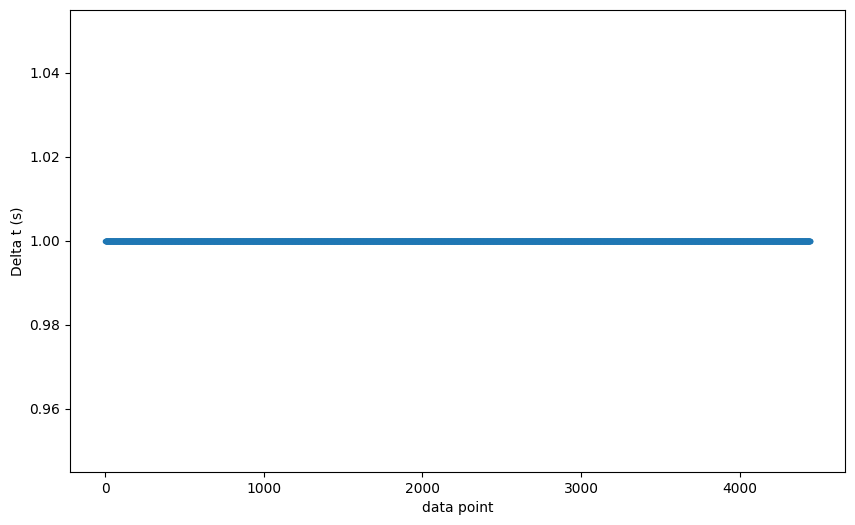

In [55]:
plt.figure(figsize=(10,6))
plt.plot( tdelta.astype('timedelta64[s]'), '.')
plt.xlabel('data point')
plt.ylabel('Delta t (s)');

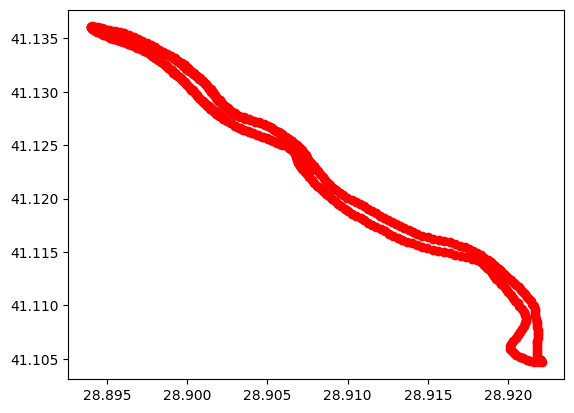

In [56]:
nskip=10
plt.plot(coords['lon'].values[::nskip], coords['lat'].values[::nskip], 'ro');

# Plot with mplleaflet

In [57]:
# prepare 3-laender-giro gps track
simple_coords = rdp(coords[['lon', 'lat']].values, epsilon=1e-5)

In [58]:
len(simple_coords)

214

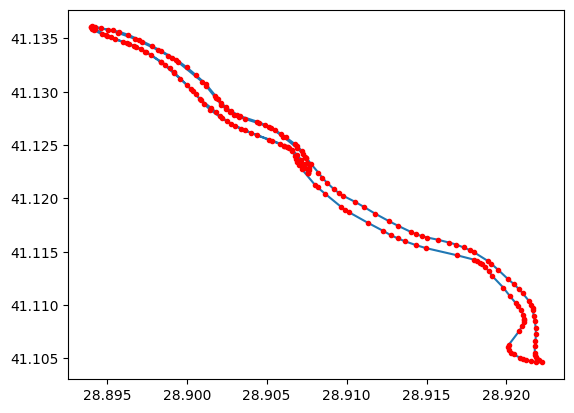

In [59]:
fig = plt.figure()
plt.plot(simple_coords[:, 0], simple_coords[:, 1])
plt.plot(simple_coords[:, 0], simple_coords[:, 1], 'r.');

# Speed

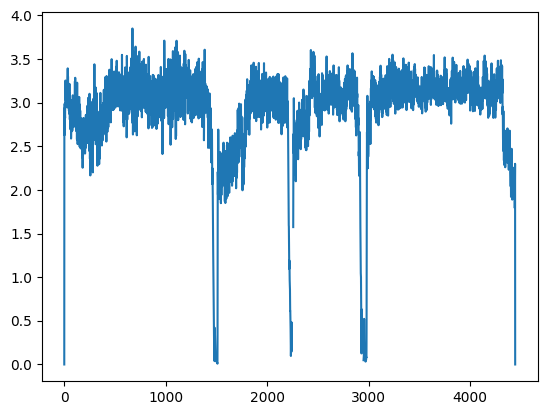

In [60]:
segment.points[0].speed, segment.points[-1].speed = 0., 0.
gpx.add_missing_speeds()
speed = np.array([p.speed for p in segment.points])
plt.plot(speed);

In [61]:
coords['speed'] = speed

In [62]:
upsampled = coords.resample('250L').ffill()

<Axes: xlabel='time'>

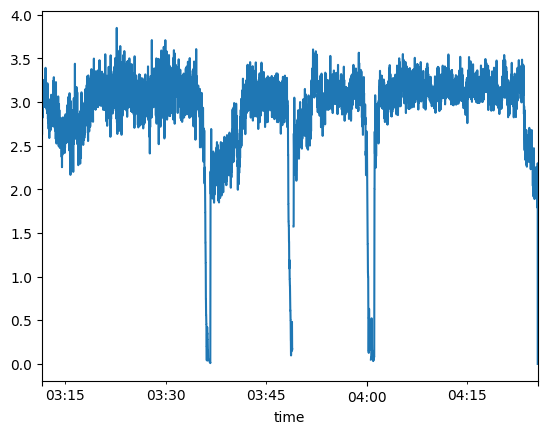

In [63]:
upsampled['speed'].plot()

In [104]:
speed_data = coords["speed"].values.astype("float64")[100:115]
time_data = coords["time"].values.astype("float64")[100:115]
time_data = (time_data-time_data[0])*1e-9
acceleration_data = np.gradient(speed_data,time_data)
#time_data[-1]/60

In [100]:
sum(np.isnan(speed_data))

0

In [115]:

upsampled = coords.resample('250L')
speed_data_2 = upsampled["speed"].values.astype("float64")[400:460]
time_data_2 = upsampled["time"].values.astype("float64")[400:460]
time_data_2 = (time_data_2-time_data_2[0])*1e-9
acceleration_data_2 = np.gradient(speed_data_2,time_data_2)
time_data_2

AttributeError: 'SeriesGroupBy' object has no attribute 'values'

In [110]:
upsampled

,lat,lon,ele,time,speed
time,,,,,
2023-08-17 03:11:29+00:00,41.104843,28.922024,None,2023-08-17 03:11:29+00:00,0.0
2023-08-17 03:11:29.250000+00:00,41.104843,28.922024,None,2023-08-17 03:11:29+00:00,0.0
2023-08-17 03:11:29.500000+00:00,41.104843,28.922024,None,2023-08-17 03:11:29+00:00,0.0
2023-08-17 03:11:29.750000+00:00,41.104843,28.922024,None,2023-08-17 03:11:29+00:00,0.0
2023-08-17 03:11:30+00:00,41.104865,28.922003,None,2023-08-17 03:11:30+00:00,2.934043
...,...,...,...,...,...
2023-08-17 04:25:33+00:00,41.104630,28.922175,None,2023-08-17 04:25:33+00:00,2.299127
2023-08-17 04:25:33.250000+00:00,41.104630,28.922175,None,2023-08-17 04:25:33+00:00,2.299127
2023-08-17 04:25:33.500000+00:00,41.104630,28.922175,None,2023-08-17 04:25:33+00:00,2.299127


In [118]:
upsampled = coords.resample('250L').ffill()
interpolated = upsampled.interpolate(method='linear', order=2)
upsampled,interpolated

ValueError: Invalid fill method. Expecting pad (ffill) or backfill (bfill). Got linear

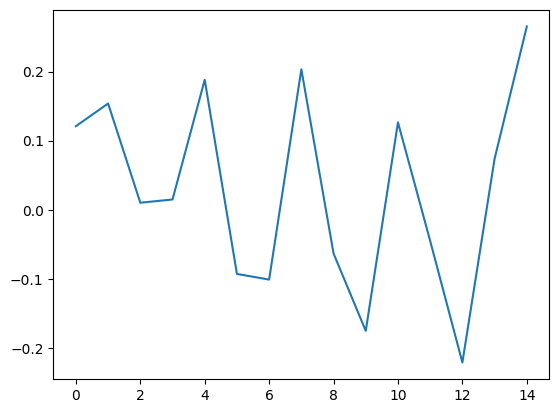

In [108]:
plt.plot(time_data,acceleration_data)
plt.plot(time_data_2,acceleration_data_2)

# Acceleration

In [64]:
upsampled_speed = np.array(upsampled["speed"])

        
are_all_floats = all(isinstance(element, float) for element in upsampled_speed)
are_any_none = any(element is None for element in upsampled_speed)


are_all_floats,are_any_none

(False, True)

In [65]:
new_upsampled = []
for i in upsampled_speed:
    if i != None:
        new_upsampled.append(i)

In [66]:
acceleration = np.gradient(new_upsampled)


In [67]:
new_data = []
for i in speed:
    if i != None:
        new_data.append(i)
        

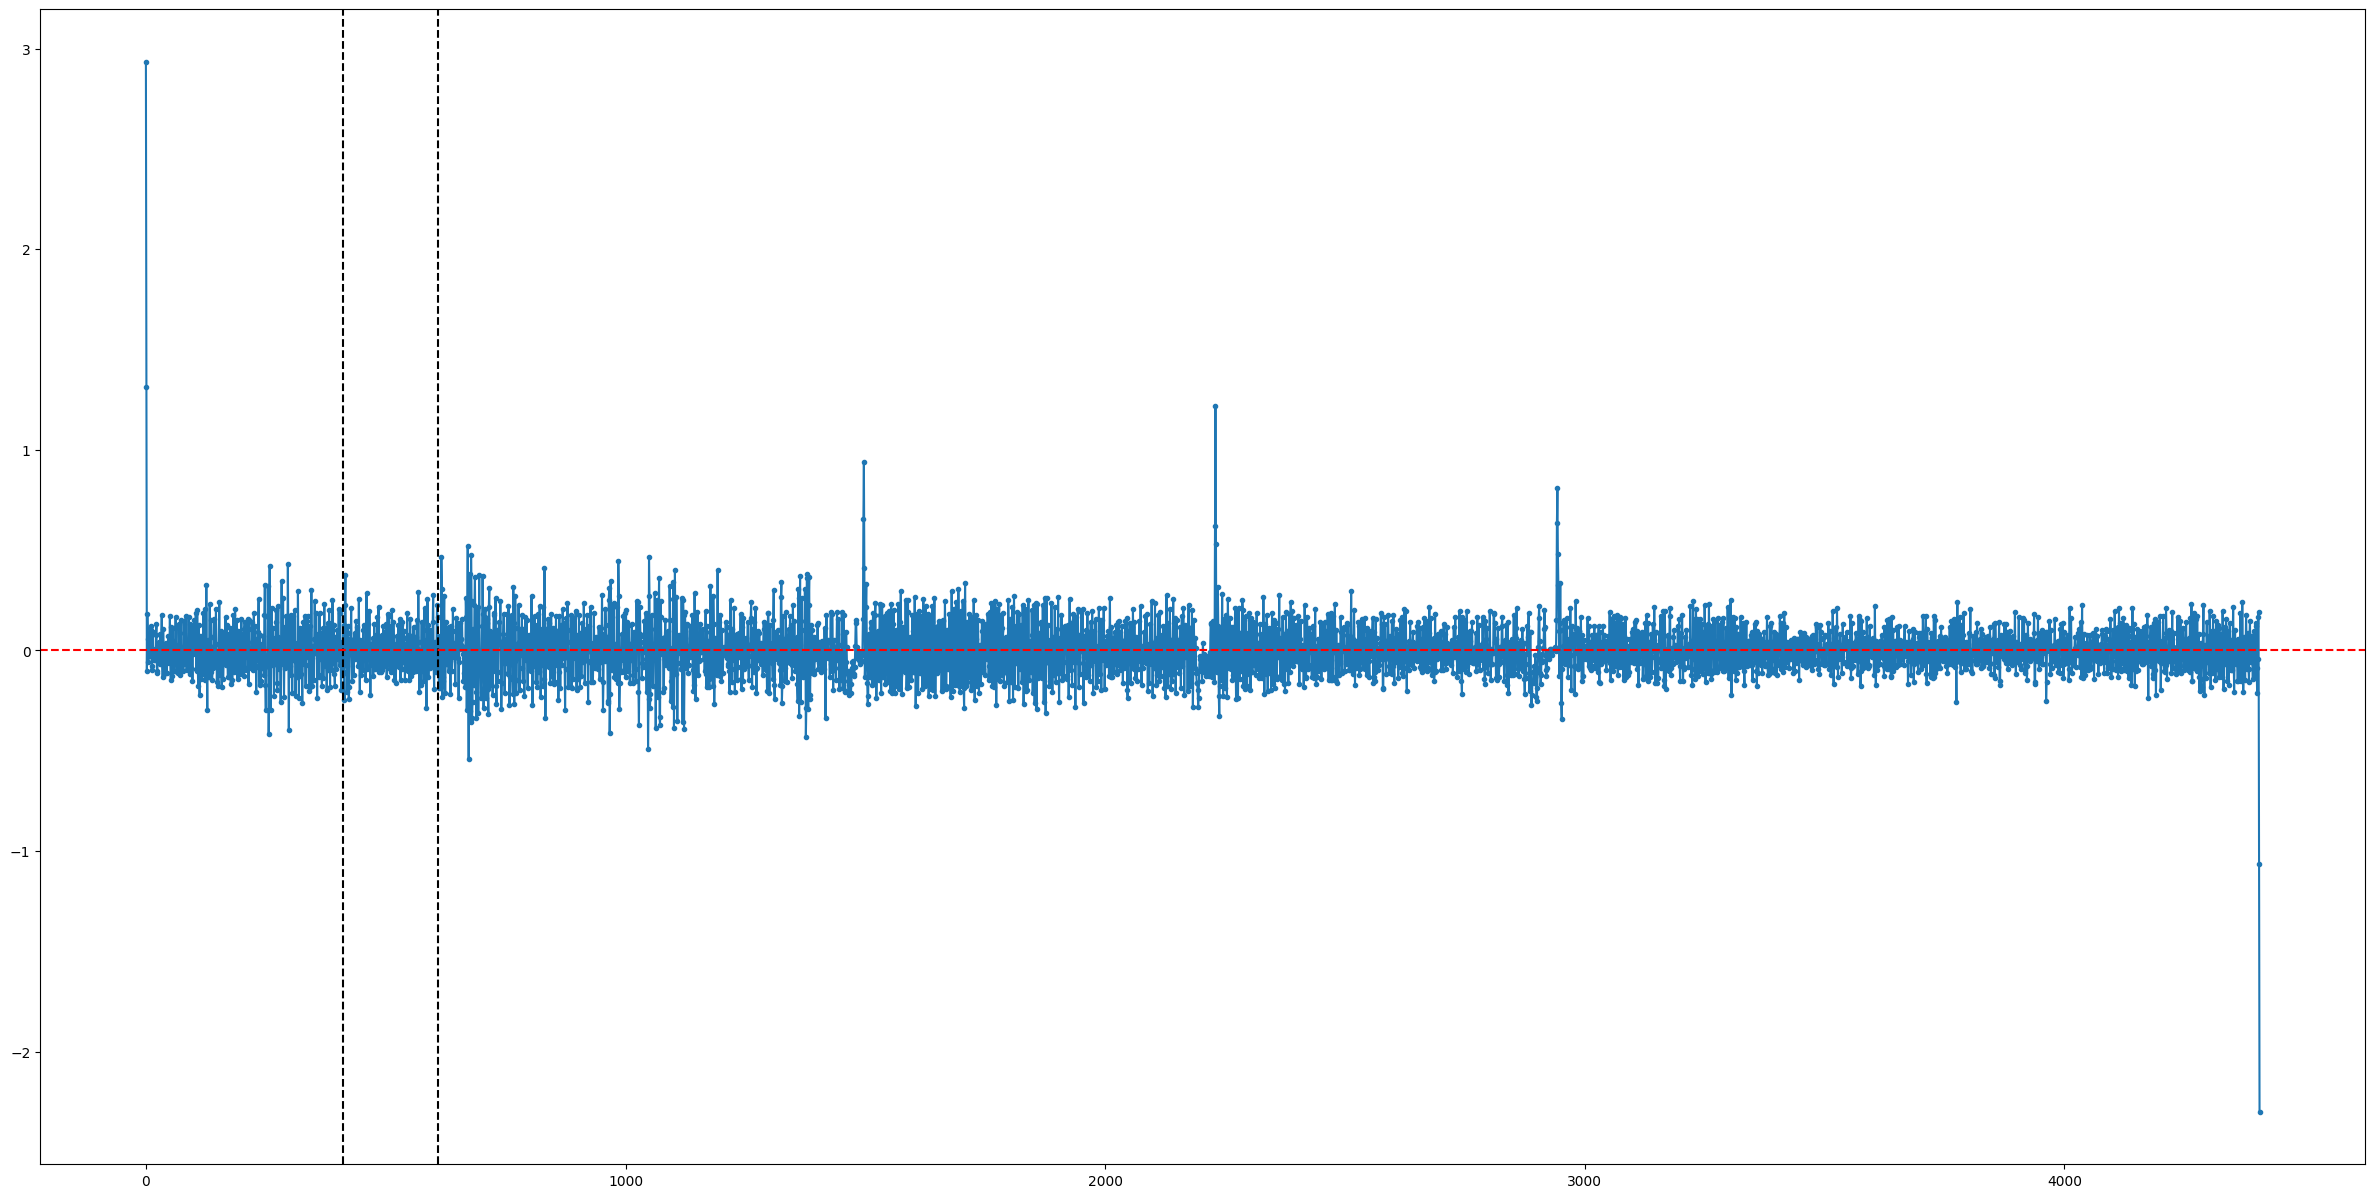

In [68]:
acceleration_2 = np.gradient(new_data)


plt.figure(figsize=(30,15))
plt.plot(acceleration_2, '.-')
cut=[410,610]
plt.axvline(cut[0],ls='--',color='k')
plt.axvline(cut[1],ls='--',color='k');
plt.axhline(0,ls='--',color='r');


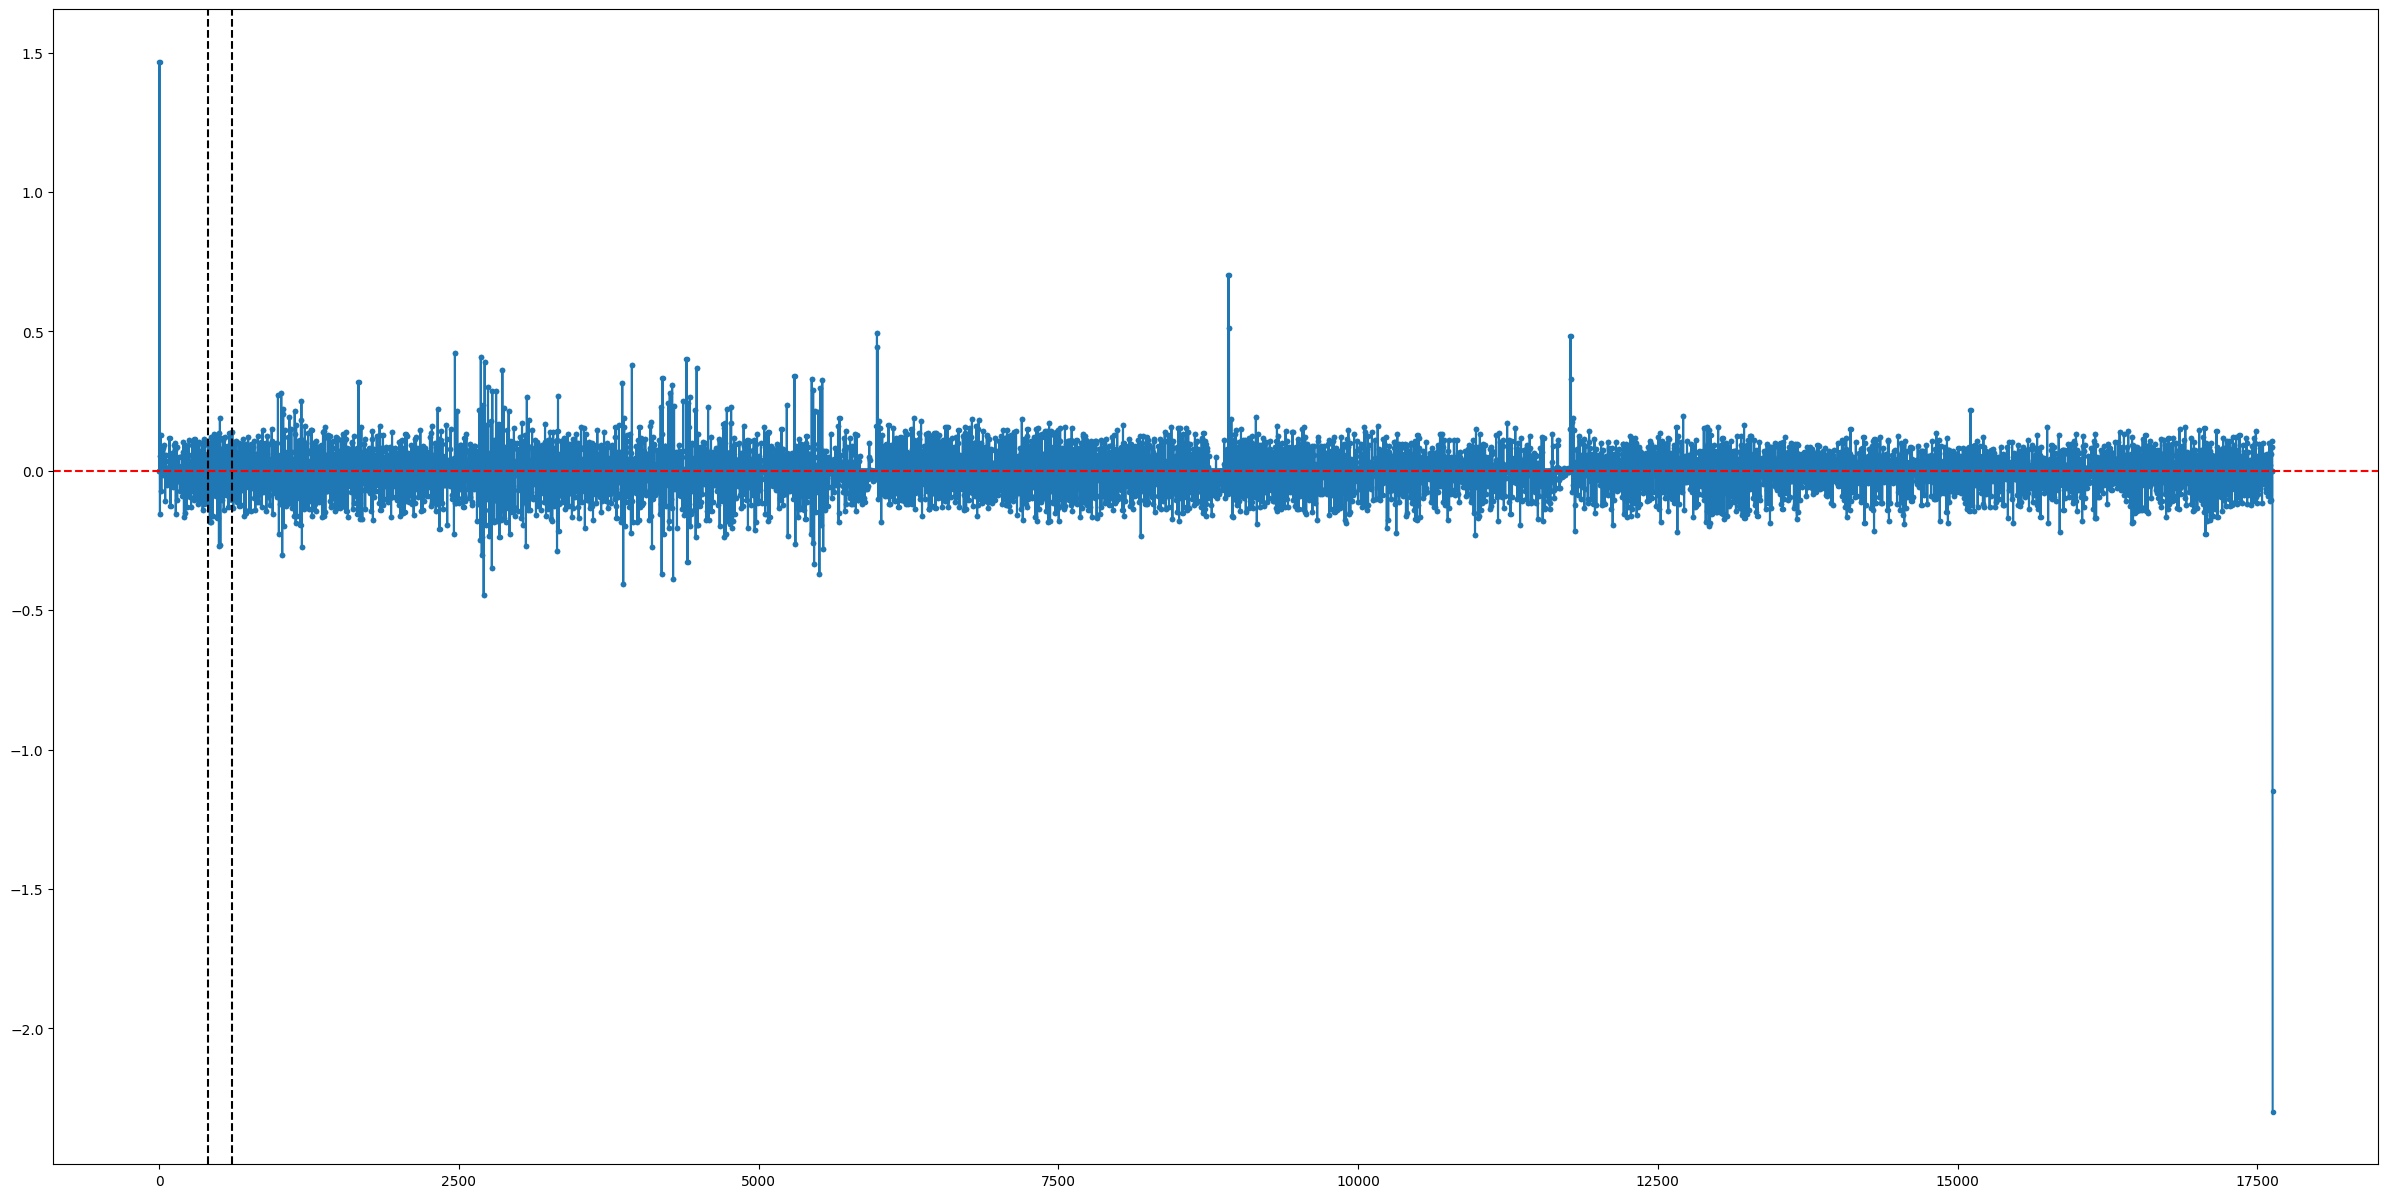

In [69]:
acceleration = np.gradient(new_upsampled)
plt.figure(figsize=(30,15))
plt.plot(acceleration, '.-')
cut=[410,610]
plt.axvline(cut[0],ls='--',color='k')
plt.axvline(cut[1],ls='--',color='k');
plt.axhline(0,ls='--',color='r');


In [70]:
data = acceleration[cut[0]:cut[1]]
len(data)
data_2 = acceleration_2[cut[0]:cut[1]]

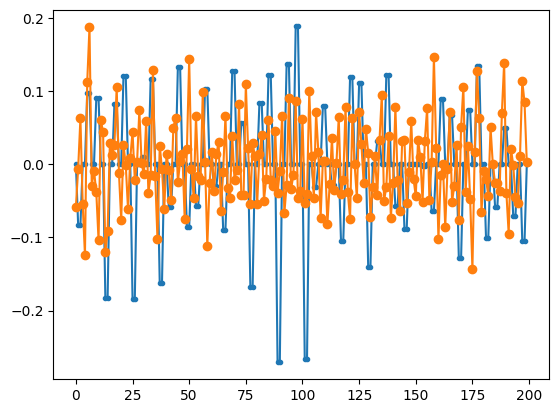

In [71]:
plt.plot(data,'.-');
plt.plot(data_2/2, "o-")

In [72]:
mean = np.average(data)
mean

-0.0027011894222815046

In [73]:
norm_data = data-mean

In [74]:
data_fft = np.fft.fft(data) 

In [75]:
Nt=len(data)

In [76]:
freqs = np.fft.fftfreq(Nt)

/Users/halilbayindir/miniconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


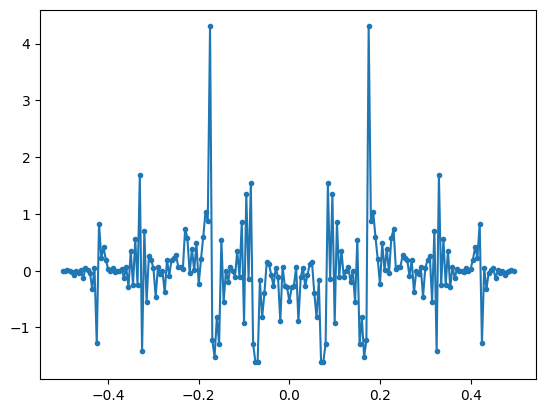

In [77]:
plt.plot(np.roll(freqs,Nt//2),np.roll(data_fft,Nt//2),'.-');

In [78]:
corr =  np.correlate(norm_data,norm_data,mode='full') 

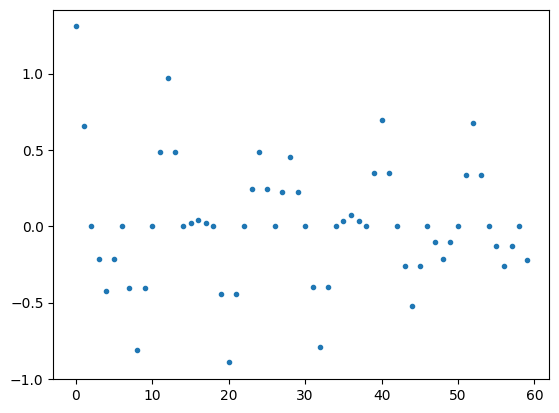

In [79]:
plt.plot(corr[corr.size//2:corr.size//2+60],'.')